# This is for my Coursera IBM Data Science Professional Certificate Capstone Project
## A Comparison between Makati City and Taguig City

#### I begin by reinstalling some libraries to avoid certain package errors.

In [12]:
!pip uninstall -y numpy
!pip install numpy
!pip uninstall -y pandas
!pip install pandas
!pip uninstall -y setuptools
!pip install setuptools
!pip uninstall -y scipy
!pip install scipy
!pip uninstall -y scikit-learn
!pip install scikit-learn
print("Done.")

Found existing installation: numpy 1.20.1
Uninstalling numpy-1.20.1:
  Successfully uninstalled numpy-1.20.1
  Using cached numpy-1.20.1-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibm-watson-machine-learning 1.0.53 requires pandas<=1.0.5, but you have pandas 1.2.3 which is incompatible.
Found existing installation: pandas 1.2.3
Uninstalling pandas-1.2.3:
  Successfully uninstalled pandas-1.2.3
  Using cached pandas-1.2.3-cp37-cp37m-manylinux1_x86_64.whl (9.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibm-watson-machine-learning 1.0.53 requires pandas<=1.0.5, but you have pandas 1.2.3 which is incompatible.
Found existing installation: setuptools 54.1.1
Uninstalling setuptools-5

In [1]:
from sklearn.cluster import KMeans
print("Done")

Done


#### I then import additional necessary libraries.

In [2]:
!pip install bs4
from bs4 import BeautifulSoup # this module helps in web scrapping.

#!pip install requests
import requests  # this module helps us to download a web page

import numpy as np # library to handle data in a vectorized manner
import pandas as pd

#import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!pip install geocoder
#import geocoder

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline 

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# KMeans from sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing

print('Libraries imported.')

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-main==custom=1937
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=1937
done

# All requested packages already installed.

Libraries imported.


#### I now gather barangay names and latest census population for Makati

In [3]:
url = "https://www.philatlas.com/luzon/ncr/makati.html"
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

#find a html table in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>
for index,table in enumerate(tables):
    if ("Barangay" in str(table)):
        table_index = index
#print(tables[table_index].prettify())

Makati_data = pd.read_html(str(tables))[table_index]
Makati_data.drop(['Population percentage (2015)', 'Population (2010)', 'Change (2010‑2015)', 'Annual Population Growth\xa0Rate (2010‑2015)'], axis=1, inplace=True)
Makati_data.rename(columns={'Population (2015)': 'Population_2015'}, inplace=True)
Makati_data.drop(Makati_data.index[-1], inplace=True)
Makati_data.head()
#list(Makati_data.columns.values)

,Barangay,Population_2015
0,Bangkal,21650
1,Bel‑Air,23685
2,Carmona,3109
3,Cembo,26213
4,Comembo,16818


#### I scrape for population density data as well:

In [4]:
# Iterate over column names 
url = "https://www.citypopulation.de/en/philippines/makati/"
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

#find a html table in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

i = 0
listrow = tables[0].tbody.find_all("tr")

for str_Barangay in Makati_data['Barangay']:
    str_row = str(listrow[i])
    start = str_row.find('data-density') + 14
    end = start + 10
    str_shortened = str_row[start:end]
    end2 = str_shortened.find('"')
    str_shortened = str_shortened[:end2]
        #print(str_Barangay, " - ", str_shortened)
    i = i + 1
    
    Makati_data.loc[Makati_data['Barangay'] == str_Barangay, 'Pop_Density'] = str_shortened

Makati_data.head()

,Barangay,Population_2015,Pop_Density
0,Bangkal,21650,24202.38
1,Bel‑Air,23685,13802.53
2,Carmona,3109,8474.39
3,Cembo,26213,60612.3
4,Comembo,16818,54653.58


#### Now I scrape the coordinate data for each Barangay.

In [11]:
str_city = 'Makati'

for str_Barangay in Makati_data['Barangay']:

    str_location = str_Barangay + ', ' + str_city
    geolocator = Nominatim(user_agent="my_user_agent")
    loc = geolocator.geocode(str_location)
    #print(str_Barangay, "latitude is :-" ,loc.latitude," and the longtitude is:-" ,loc.longitude)
    
    Makati_data.loc[Makati_data['Barangay'] == str_Barangay, 'Latitude'] = loc.latitude
    Makati_data.loc[Makati_data['Barangay'] == str_Barangay, 'Longitude'] = loc.longitude
    
Makati_data.head()

,Barangay,Population_2015,Pop_Density,Latitude,Longitude
0,Bangkal,21650,24202.38,14.543327,121.012626
1,Bel‑Air,23685,13802.53,14.562216,121.026759
2,Carmona,3109,8474.39,14.577798,121.018255
3,Cembo,26213,60612.3,14.564715,121.050611
4,Comembo,16818,54653.58,14.548674,121.064323


#### I now do the same 3 steps for Taguig:

In [8]:
url = "https://www.philatlas.com/luzon/ncr/taguig.html"
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

#find a html table in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>
for index,table in enumerate(tables):
    if ("Barangay" in str(table)):
        table_index = index
#print(tables[table_index].prettify())

Taguig_data = pd.read_html(str(tables))[table_index]
Taguig_data.drop(['Population percentage (2015)', 'Population (2010)', 'Change (2010‑2015)', 'Annual Population Growth\xa0Rate (2010‑2015)'], axis=1, inplace=True)
Taguig_data.rename(columns={'Population (2015)': 'Population_2015'}, inplace=True)
Taguig_data.drop(Taguig_data.index[-1], inplace=True)
Taguig_data.head()
#list(Makati_data.columns.values)

,Barangay,Population_2015
0,Bagumbayan,40685
1,Bambang,10010
2,Calzada,21747
3,Central Bicutan,28705
4,Central Signal Village,39674


In [9]:
# Iterate over column names 
url = "https://www.citypopulation.de/en/philippines/taguig/"
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

#find a html table in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

i = 0
listrow = tables[0].tbody.find_all("tr")

for str_Barangay in Taguig_data['Barangay']:
    str_row = str(listrow[i])
    start = str_row.find('data-density') + 14
    end = start + 10
    str_shortened = str_row[start:end]
    end2 = str_shortened.find('"')
    str_shortened = str_shortened[:end2]
        #print(str_Barangay, " - ", str_shortened)
    i = i + 1
    
    Taguig_data.loc[Taguig_data['Barangay'] == str_Barangay, 'Pop_Density'] = str_shortened

Taguig_data.head()

,Barangay,Population_2015,Pop_Density
0,Bagumbayan,40685,18000.46
1,Bambang,10010,23641.95
2,Calzada,21747,12106.28
3,Central Bicutan,28705,33493.19
4,Central Signal Village,39674,55235.5


In [10]:
str_city = 'Taguig'
for str_Barangay in Taguig_data['Barangay']:

    str_location = str_Barangay + ', ' + str_city
    geolocator = Nominatim(user_agent="my_user_agent")
    loc = geolocator.geocode(str_location)
    #print(str_Barangay, "latitude is :-" ,loc.latitude," and the longtitude is:-" ,loc.longitude)
    
    Taguig_data.loc[Taguig_data['Barangay'] == str_Barangay, 'Latitude'] = loc.latitude
    Taguig_data.loc[Taguig_data['Barangay'] == str_Barangay, 'Longitude'] = loc.longitude
    
Taguig_data.head()

,Barangay,Population_2015,Pop_Density,Latitude,Longitude
0,Bagumbayan,40685,18000.46,14.474168,121.059282
1,Bambang,10010,23641.95,14.523763,121.068601
2,Calzada,21747,12106.28,14.533793,121.080071
3,Central Bicutan,28705,33493.19,14.492407,121.052141
4,Central Signal Village,39674,55235.5,14.512656,121.056308


#### I now prepare a map of Makati:

In [175]:
address = 'Makati, Philippines'

geolocator = Nominatim(user_agent="Makati")
location = geolocator.geocode(address)
makati_latitude = location.latitude
makati_longitude = location.longitude
print('The geograpical coordinate of', address, 'are {}, {}.'.format(makati_latitude, makati_longitude))

The geograpical coordinate of Makati, Philippines are 14.5567949, 121.0211226.


In [186]:
# create map of Makati using latitude and longitude values
map_makati = folium.Map(location=[makati_latitude-0.03, makati_longitude], zoom_start=13)

# add markers to map
for lat, lng, barangay, popdensity in zip(Makati_data['Latitude'], Makati_data['Longitude'], Makati_data['Barangay'], Makati_data['Pop_Density']):
    label = 'Barangay, Pop. Density = ' + '{}, {}'.format(barangay, popdensity)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=float(popdensity)//150,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makati)  
    
map_makati

#### I now do the same for Taguig:

In [177]:
address = 'Taguig, Philippines'

geolocator = Nominatim(user_agent="Taguig")
location = geolocator.geocode(address)
taguig_latitude = location.latitude
taguig_longitude = location.longitude
print('The geograpical coordinate of', address, 'are {}, {}.'.format(taguig_latitude, taguig_longitude))

The geograpical coordinate of Taguig, Philippines are 14.5288867, 121.0699173.


In [184]:
# create map of Makati using latitude and longitude values
map_taguig = folium.Map(location=[taguig_latitude-0.03, taguig_longitude], zoom_start=13)

# add markers to map
for lat, lng, barangay, popdensity in zip(Taguig_data['Latitude'], Taguig_data['Longitude'], Taguig_data['Barangay'], Taguig_data['Pop_Density']):
    label = 'Barangay, Pop. Density = ' + '{}, {}'.format(barangay, popdensity)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=float(popdensity)//150,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_taguig)  
    
map_taguig

#### This is to define my Foursquare credentials

In [16]:
CLIENT_ID = 'RYEYR1MIOM31BKZPPGHTY50N21G3OGEICV0HRT2MO5TMOJO4' # your Foursquare ID
CLIENT_SECRET = 'MCFTLL2ZC4U5KIJAYHJC33S4PI33O5CJH2HVIKR21IVR4CPA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RYEYR1MIOM31BKZPPGHTY50N21G3OGEICV0HRT2MO5TMOJO4
CLIENT_SECRET:MCFTLL2ZC4U5KIJAYHJC33S4PI33O5CJH2HVIKR21IVR4CPA


In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Barangay', 
                  'Barangay Latitude', 
                  'Barangay Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
#print("Function defined")

In [27]:
{
    "tags": [
        "hide-output",
    ]
}
makati_venues = getNearbyVenues(names=Makati_data['Barangay'],
                                   latitudes=Makati_data['Latitude'],
                                   longitudes=Makati_data['Longitude'])

taguig_venues = getNearbyVenues(names=Taguig_data['Barangay'],
                                   latitudes=Taguig_data['Latitude'],
                                   longitudes=Taguig_data['Longitude'])
print("Done.")

Bangkal
Bel‑Air
Carmona
Cembo
Comembo
Dasmariñas
East Rembo
Forbes Park
Guadalupe Nuevo
Guadalupe Viejo
Kasilawan
La Paz
Magallanes
Olympia
Palanan
Pembo
Pinagkaisahan
Pio del Pilar
Pitogo
Poblacion
Post Proper Northside
Post Proper Southside
Rizal
San Antonio
San Isidro
San Lorenzo
Santa Cruz
Singkamas
South Cembo
Tejeros
Urdaneta
Valenzuela
West Rembo
Bagumbayan
Bambang
Calzada
Central Bicutan
Central Signal Village
Fort Bonifacio
Hagonoy
Ibayo‑Tipas
Katuparan
Ligid‑Tipas
Lower Bicutan
Maharlika Village
Napindan
New Lower Bicutan
North Daang Hari
North Signal Village
Palingon
Pinagsama
San Miguel
Santa Ana
South Daang Hari
South Signal Village
Tanyag
Tuktukan
Upper Bicutan
Ususan
Wawa
Western Bicutan
Done.


In [28]:
print(makati_venues.shape)
makati_venues.head()

#makati_venues['Venue Category'].unique()

(2176, 7)


,Barangay,Barangay Latitude,Barangay Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bangkal,14.543327,121.012626,100g Burger's,14.545715,121.013222,Burger Joint
1,Bangkal,14.543327,121.012626,Kaito Japanese Carinderia,14.543683,121.012782,Japanese Restaurant
2,Bangkal,14.543327,121.012626,FitFast Wellness and Fitness Center,14.547046,121.014352,Gym
3,Bangkal,14.543327,121.012626,Spare Strike,14.540995,121.011987,Tapas Restaurant
4,Bangkal,14.543327,121.012626,Park Avenue Desserts,14.539097,121.017169,Dessert Shop


In [29]:
print(taguig_venues.shape)
taguig_venues.head()

(462, 7)


,Barangay,Barangay Latitude,Barangay Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bagumbayan,14.474168,121.059282,Cayetano Sports Complex,14.473551,121.059272,Basketball Court
1,Bagumbayan,14.474168,121.059282,"Andatoria Bay Resort, Bagumbayan",14.473162,121.059530,Water Park
2,Bagumbayan,14.474168,121.059282,Mercury Drug,14.469831,121.056938,Pharmacy
3,Bagumbayan,14.474168,121.059282,"Mahogany Homes, Taguig Tennis Court",14.479082,121.058063,Tennis Court
4,Bagumbayan,14.474168,121.059282,Newtown Burgers,14.468532,121.056988,Burger Joint


In [31]:
# one hot encoding
makati_onehot = pd.get_dummies(makati_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
makati_onehot['Barangay'] = makati_venues['Barangay']

# move Barangay column to the first column
fixed_columns = [makati_onehot.columns[-1]] + list(makati_onehot.columns[:-1])
#print(fixed_columns)
makati_onehot = makati_onehot[fixed_columns]
makati_onehot.head()

,Barangay,ATM,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Bangkal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bangkal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bangkal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bangkal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bangkal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# one hot encoding
taguig_onehot = pd.get_dummies(taguig_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
taguig_onehot['Barangay'] = taguig_venues['Barangay']

# move Barangay column to the first column
fixed_columns = [taguig_onehot.columns[-1]] + list(taguig_onehot.columns[:-1])
#print(fixed_columns)
taguig_onehot = taguig_onehot[fixed_columns]
taguig_onehot.head()

,Barangay,Airport Terminal,American Restaurant,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Baseball Field,...,Toll Booth,Toll Plaza,Tonkatsu Restaurant,Train Station,Udon Restaurant,Veterinarian,Water Park,Whisky Bar,Wings Joint,Women's Store
0,Bagumbayan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bagumbayan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Bagumbayan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bagumbayan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bagumbayan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
makati_grouped = makati_onehot.groupby('Barangay').mean().reset_index()

#merge population density and latitude/longitude columns as well
makati_grouped_merged = makati_grouped.join(Makati_data.set_index('Barangay'), on='Barangay')
makati_grouped_merged.drop('Population_2015', 1, inplace=True)
makati_grouped_merged.head()

#makati_merged = makati_merged.join(makati_venues_sorted.set_index('Barangay'), on='Barangay')

,Barangay,ATM,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Pop_Density,Latitude,Longitude
0,Bangkal,0.0,0.00,0.0,0.0,0.0,0.00,0.032258,0.032258,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,24202.38,14.543327,121.012626
1,Bel‑Air,0.0,0.01,0.0,0.0,0.0,0.01,0.010000,0.000000,0.0,...,0.0,0.0,0.0,0.01,0.0,0.0,0.01,13802.53,14.562216,121.026759
2,Carmona,0.0,0.00,0.0,0.0,0.0,0.00,0.015873,0.015873,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,8474.39,14.577798,121.018255
3,Cembo,0.0,0.00,0.0,0.0,0.0,0.00,0.034483,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,60612.3,14.564715,121.050611
4,Comembo,0.0,0.00,0.0,0.0,0.0,0.00,0.050000,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,54653.58,14.548674,121.064323


In [123]:
x = makati_grouped_merged.drop('Barangay', 1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
makati_normalized = pd.DataFrame(x_scaled)
makati_normalized.head()

#makati_grouped_clustering = makati_grouped_merged.drop('Barangay', 1)

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0.0,0.00,0.0,0.0,0.0,0.000,0.645161,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.281107,0.124138,0.153379
1,0.0,0.37,0.0,0.0,0.0,0.415,0.200000,0.000000,0.0,0.333333,...,0.0,0.0,0.0,0.5,0.0,0.0,0.68,0.155421,0.604076,0.384825
2,0.0,0.00,0.0,0.0,0.0,0.000,0.317460,0.492063,0.0,0.264550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.091028,1.000000,0.245569
3,0.0,0.00,0.0,0.0,0.0,0.000,0.689655,0.000000,0.0,0.287356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.721134,0.667573,0.775447
4,0.0,0.00,0.0,0.0,0.0,0.000,1.000000,0.000000,0.0,0.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.649121,0.259999,1.000000


,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.102412,0.039984,0.355318
1,0.000000,0.0,0.0,0.0,0.0,0.153846,0.000000,0.0,0.0,0.192308,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.158781,0.674123,0.552653
2,0.000000,0.0,0.0,0.0,0.0,0.222222,0.055556,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043519,0.802366,0.795516
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257213,0.273194,0.204113
4,0.352941,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474459,0.532102,0.292347


In [125]:
taguig_grouped = taguig_onehot.groupby('Barangay').mean().reset_index()

#merge population density and latitude/longitude columns as well
taguig_grouped_merged = taguig_grouped.join(Taguig_data.set_index('Barangay'), on='Barangay')
taguig_grouped_merged.drop('Population_2015', 1, inplace=True)
taguig_grouped_merged.head()

,Barangay,Airport Terminal,American Restaurant,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Baseball Field,...,Train Station,Udon Restaurant,Veterinarian,Water Park,Whisky Bar,Wings Joint,Women's Store,Pop_Density,Latitude,Longitude
0,Bagumbayan,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.2,0.0,0.000000,0.0,18000.46,14.474168,121.059282
1,Bambang,0.000000,0.0,0.0,0.0,0.0,0.038462,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,23641.95,14.523763,121.068601
2,Calzada,0.000000,0.0,0.0,0.0,0.0,0.055556,0.055556,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,12106.28,14.533793,121.080071
3,Central Bicutan,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,33493.19,14.492407,121.052141
4,Central Signal Village,0.058824,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,55235.5,14.512656,121.056308


In [126]:
x = taguig_grouped_merged.drop('Barangay', 1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
taguig_normalized = pd.DataFrame(x_scaled)
taguig_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.102412,0.039984,0.355318
1,0.000000,0.0,0.0,0.0,0.0,0.153846,0.000000,0.0,0.0,0.192308,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.158781,0.674123,0.552653
2,0.000000,0.0,0.0,0.0,0.0,0.222222,0.055556,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043519,0.802366,0.795516
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257213,0.273194,0.204113
4,0.352941,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474459,0.532102,0.292347


In [97]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [92]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
makati_columns = ['Barangay']
for ind in np.arange(num_top_venues):
    try:
        makati_columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        makati_columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
makati_venues_sorted = pd.DataFrame(columns=makati_columns)
makati_venues_sorted['Barangay'] = makati_grouped['Barangay']

for ind in np.arange(makati_grouped.shape[0]):
    makati_venues_sorted.iloc[ind, 1:] = return_most_common_venues(makati_grouped.iloc[ind, :], num_top_venues)

makati_venues_sorted.head()

,Barangay,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bangkal,Fast Food Restaurant,Gym,Donut Shop,Diner,Japanese Restaurant,Bubble Tea Shop,Coffee Shop,Filipino Restaurant,Gym / Fitness Center,Hardware Store
1,Bel‑Air,Coffee Shop,Korean Restaurant,Café,Cocktail Bar,Hostel,Pizza Place,Restaurant,Bar,Filipino Restaurant,Spa
2,Carmona,Fast Food Restaurant,Convenience Store,Burger Joint,Coffee Shop,Basketball Court,Supermarket,Café,Soup Place,Burrito Place,Gym
3,Cembo,Convenience Store,Fast Food Restaurant,Sandwich Place,Coffee Shop,Filipino Restaurant,Breakfast Spot,Park,Gastropub,Asian Restaurant,Hotel
4,Comembo,Fast Food Restaurant,Convenience Store,Café,Resort,BBQ Joint,Breakfast Spot,Chinese Restaurant,Gym / Fitness Center,Pizza Place,Pharmacy


In [98]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
taguig_columns = ['Barangay']
for ind in np.arange(num_top_venues):
    try:
        taguig_columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        taguig_columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
taguig_venues_sorted = pd.DataFrame(columns=taguig_columns)
taguig_venues_sorted['Barangay'] = taguig_grouped['Barangay']

for ind in np.arange(taguig_grouped.shape[0]):
    taguig_venues_sorted.iloc[ind, 1:] = return_most_common_venues(taguig_grouped.iloc[ind, :], num_top_venues)

taguig_venues_sorted.head()

,Barangay,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bagumbayan,Basketball Court,Burger Joint,Water Park,Tennis Court,Pharmacy,Airport Terminal,Paella Restaurant,Park,Performing Arts Venue,Pizza Place
1,Bambang,Fast Food Restaurant,Wings Joint,Flea Market,Café,Pharmacy,Gym,Sandwich Place,Gym / Fitness Center,Deli / Bodega,Snack Place
2,Calzada,Pizza Place,Ice Cream Shop,Bookstore,Indoor Play Area,Fried Chicken Joint,Food Court,Fast Food Restaurant,Restaurant,Department Store,Cosmetics Shop
3,Central Bicutan,Bar,Pharmacy,Spa,Filipino Restaurant,Airport Terminal,Other Nightlife,Pub,Portuguese Restaurant,Pool,Plaza
4,Central Signal Village,Chinese Restaurant,Convenience Store,Market,Airport Terminal,Filipino Restaurant,Fried Chicken Joint,Soup Place,Fast Food Restaurant,Electronics Store,Grocery Store


#### This is to apply the KMeans algorithm for clustering.

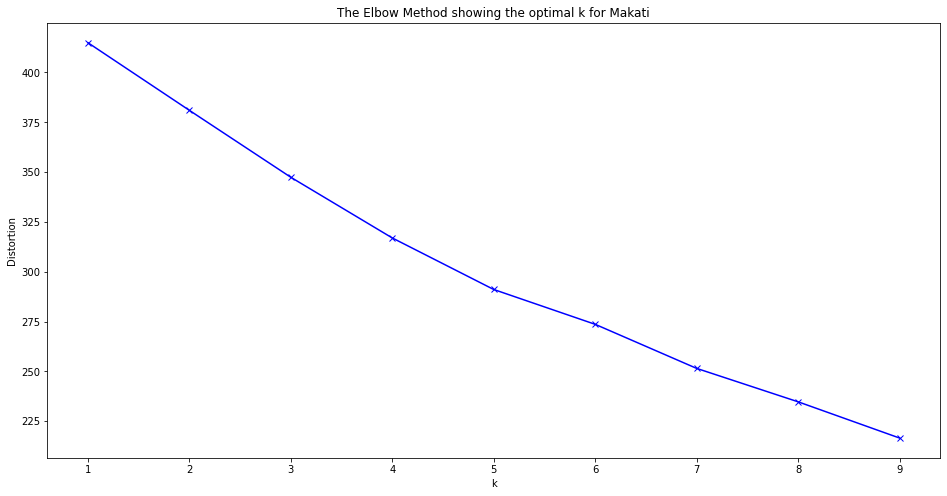

In [121]:
distortions = []
K = range(1,10)
#makati_grouped_clustering = makati_grouped_merged.drop('Barangay', 1)  --> this uses non-normalized data
makati_grouped_clustering = makati_normalized  # --> this uses normalized data

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(makati_grouped_clustering)
    distortions.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Makati')
plt.show()

In [159]:
# set number of clusters
makati_kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=makati_kclusters, random_state=1).fit(makati_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#print(kmeans.labels_[0:100])

# add clustering labels
if 'Cluster Labels' in makati_venues_sorted.columns:
    makati_venues_sorted.drop('Cluster Labels', 1, inplace=True)
makati_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
makati_venues_sorted.sort_values('Barangay').head(10)

#neighborhoods_venues_sorted[neighborhoods_venues_sorted.isna().any(axis=1)]
#print(neighborhoods_venues_sorted['Cluster Labels'].to_string(index=False))

,Cluster Labels,Barangay,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Bangkal,Fast Food Restaurant,Gym,Donut Shop,Diner,Japanese Restaurant,Bubble Tea Shop,Coffee Shop,Filipino Restaurant,Gym / Fitness Center,Hardware Store
1,0,Bel‑Air,Coffee Shop,Korean Restaurant,Café,Cocktail Bar,Hostel,Pizza Place,Restaurant,Bar,Filipino Restaurant,Spa
2,1,Carmona,Fast Food Restaurant,Convenience Store,Burger Joint,Coffee Shop,Basketball Court,Supermarket,Café,Soup Place,Burrito Place,Gym
3,0,Cembo,Convenience Store,Fast Food Restaurant,Sandwich Place,Coffee Shop,Filipino Restaurant,Breakfast Spot,Park,Gastropub,Asian Restaurant,Hotel
4,0,Comembo,Fast Food Restaurant,Convenience Store,Café,Resort,BBQ Joint,Breakfast Spot,Chinese Restaurant,Gym / Fitness Center,Pizza Place,Pharmacy
5,0,Dasmariñas,Coffee Shop,Hotel,Theater,Event Space,Bar,Tapas Restaurant,Paella Restaurant,Ice Cream Shop,Diner,Art Gallery
6,0,East Rembo,Convenience Store,Diner,Café,Fast Food Restaurant,Optical Shop,Breakfast Spot,Nail Salon,Chinese Restaurant,Fish Market,Gym / Fitness Center
7,0,Forbes Park,Japanese Restaurant,Lounge,Italian Restaurant,Café,French Restaurant,Coffee Shop,Bakery,Deli / Bodega,Cafeteria,Spa
8,0,Guadalupe Nuevo,Convenience Store,Fast Food Restaurant,Breakfast Spot,Café,Sporting Goods Shop,Bubble Tea Shop,Basketball Court,Coffee Shop,Filipino Restaurant,Bakery
9,0,Guadalupe Viejo,Convenience Store,Fast Food Restaurant,Bakery,Restaurant,Café,Filipino Restaurant,Donut Shop,Japanese Restaurant,Coffee Shop,Italian Restaurant


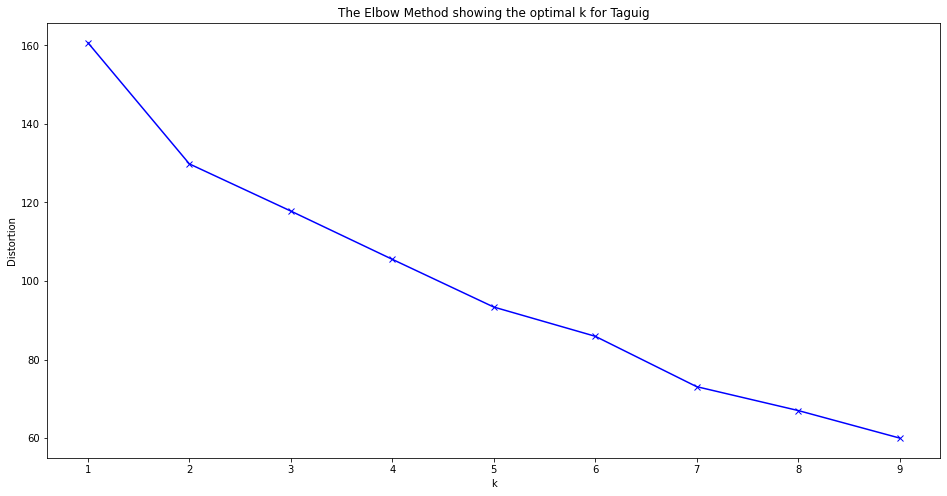

In [127]:
distortions = []
K = range(1,10)
#taguig_grouped_clustering = taguig_grouped_merged.drop('Barangay', 1)  --> this uses non-normalized data
taguig_grouped_clustering = taguig_normalized  #--> this uses normalized data

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(taguig_grouped_clustering)
    distortions.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Taguig')
plt.show()

In [153]:
# set number of clusters
taguig_kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=taguig_kclusters, random_state=1).fit(taguig_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#print(kmeans.labels_[0:100])

# add clustering labels
if 'Cluster Labels' in taguig_venues_sorted.columns:
    taguig_venues_sorted.drop('Cluster Labels', 1, inplace=True)
taguig_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
taguig_venues_sorted.sort_values('Barangay').head(10)

,Cluster Labels,Barangay,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Bagumbayan,Basketball Court,Burger Joint,Water Park,Tennis Court,Pharmacy,Airport Terminal,Paella Restaurant,Park,Performing Arts Venue,Pizza Place
1,1,Bambang,Fast Food Restaurant,Wings Joint,Flea Market,Café,Pharmacy,Gym,Sandwich Place,Gym / Fitness Center,Deli / Bodega,Snack Place
2,1,Calzada,Pizza Place,Ice Cream Shop,Bookstore,Indoor Play Area,Fried Chicken Joint,Food Court,Fast Food Restaurant,Restaurant,Department Store,Cosmetics Shop
3,1,Central Bicutan,Bar,Pharmacy,Spa,Filipino Restaurant,Airport Terminal,Other Nightlife,Pub,Portuguese Restaurant,Pool,Plaza
4,1,Central Signal Village,Chinese Restaurant,Convenience Store,Market,Airport Terminal,Filipino Restaurant,Fried Chicken Joint,Soup Place,Fast Food Restaurant,Electronics Store,Grocery Store
5,0,Fort Bonifacio,Coffee Shop,Café,Japanese Restaurant,Ice Cream Shop,French Restaurant,Italian Restaurant,Hotel,Sporting Goods Shop,Clothing Store,Deli / Bodega
6,1,Hagonoy,Sandwich Place,Water Park,Pool,Diner,Basketball Court,Nightclub,Pub,Portuguese Restaurant,Plaza,Playground
7,1,Ibayo‑Tipas,Bakery,Convenience Store,Airport Terminal,Other Nightlife,Restaurant,Ramen Restaurant,Pub,Portuguese Restaurant,Pool,Plaza
8,1,Katuparan,Asian Restaurant,Airport Terminal,Café,Filipino Restaurant,Flea Market,Paella Restaurant,Ramen Restaurant,Pub,Portuguese Restaurant,Pool
9,1,Ligid‑Tipas,Convenience Store,Bakery,Spa,Other Nightlife,Restaurant,Ramen Restaurant,Pub,Portuguese Restaurant,Pool,Plaza


In [160]:
makati_merged = Makati_data

# merge makati_grouped with makati_data to add latitude/longitude for each neighborhood
makati_merged = makati_merged.join(makati_venues_sorted.set_index('Barangay'), on='Barangay')

makati_merged.sort_values('Barangay').head(10)
#toronto_merged[toronto_merged.isna().any(axis=1)]
#print(toronto_merged['Cluster Labels'].to_string(index=False))

,Barangay,Population_2015,Pop_Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bangkal,21650,24202.38,14.543327,121.012626,0,Fast Food Restaurant,Gym,Donut Shop,Diner,Japanese Restaurant,Bubble Tea Shop,Coffee Shop,Filipino Restaurant,Gym / Fitness Center,Hardware Store
1,Bel‑Air,23685,13802.53,14.562216,121.026759,0,Coffee Shop,Korean Restaurant,Café,Cocktail Bar,Hostel,Pizza Place,Restaurant,Bar,Filipino Restaurant,Spa
2,Carmona,3109,8474.39,14.577798,121.018255,1,Fast Food Restaurant,Convenience Store,Burger Joint,Coffee Shop,Basketball Court,Supermarket,Café,Soup Place,Burrito Place,Gym
3,Cembo,26213,60612.3,14.564715,121.050611,0,Convenience Store,Fast Food Restaurant,Sandwich Place,Coffee Shop,Filipino Restaurant,Breakfast Spot,Park,Gastropub,Asian Restaurant,Hotel
4,Comembo,16818,54653.58,14.548674,121.064323,0,Fast Food Restaurant,Convenience Store,Café,Resort,BBQ Joint,Breakfast Spot,Chinese Restaurant,Gym / Fitness Center,Pizza Place,Pharmacy
5,Dasmariñas,5589,2851.41,14.540143,121.026976,0,Coffee Shop,Hotel,Theater,Event Space,Bar,Tapas Restaurant,Paella Restaurant,Ice Cream Shop,Diner,Art Gallery
6,East Rembo,28114,52211.86,14.553138,121.062483,0,Convenience Store,Diner,Café,Fast Food Restaurant,Optical Shop,Breakfast Spot,Nail Salon,Chinese Restaurant,Fish Market,Gym / Fitness Center
7,Forbes Park,2335,942.28,14.547183,121.035516,0,Japanese Restaurant,Lounge,Italian Restaurant,Café,French Restaurant,Coffee Shop,Bakery,Deli / Bodega,Cafeteria,Spa
8,Guadalupe Nuevo,18341,31769.76,14.561200,121.044901,0,Convenience Store,Fast Food Restaurant,Breakfast Spot,Café,Sporting Goods Shop,Bubble Tea Shop,Basketball Court,Coffee Shop,Filipino Restaurant,Bakery
9,Guadalupe Viejo,13415,24167.69,14.566210,121.042746,0,Convenience Store,Fast Food Restaurant,Bakery,Restaurant,Café,Filipino Restaurant,Donut Shop,Japanese Restaurant,Coffee Shop,Italian Restaurant


In [129]:
taguig_merged = Taguig_data

# merge taguig_grouped with makati_data to add latitude/longitude for each neighborhood
taguig_merged = taguig_merged.join(taguig_venues_sorted.set_index('Barangay'), on='Barangay')

taguig_merged.sort_values('Barangay').head(10)

,Barangay,Population_2015,Pop_Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bagumbayan,40685,18000.46,14.474168,121.059282,1,Basketball Court,Burger Joint,Water Park,Tennis Court,Pharmacy,Airport Terminal,Paella Restaurant,Park,Performing Arts Venue,Pizza Place
1,Bambang,10010,23641.95,14.523763,121.068601,1,Fast Food Restaurant,Wings Joint,Flea Market,Café,Pharmacy,Gym,Sandwich Place,Gym / Fitness Center,Deli / Bodega,Snack Place
2,Calzada,21747,12106.28,14.533793,121.080071,1,Pizza Place,Ice Cream Shop,Bookstore,Indoor Play Area,Fried Chicken Joint,Food Court,Fast Food Restaurant,Restaurant,Department Store,Cosmetics Shop
3,Central Bicutan,28705,33493.19,14.492407,121.052141,1,Bar,Pharmacy,Spa,Filipino Restaurant,Airport Terminal,Other Nightlife,Pub,Portuguese Restaurant,Pool,Plaza
4,Central Signal Village,39674,55235.5,14.512656,121.056308,1,Chinese Restaurant,Convenience Store,Market,Airport Terminal,Filipino Restaurant,Fried Chicken Joint,Soup Place,Fast Food Restaurant,Electronics Store,Grocery Store
5,Fort Bonifacio,11739,7750.87,14.549250,121.050641,0,Coffee Shop,Café,Japanese Restaurant,Ice Cream Shop,French Restaurant,Italian Restaurant,Hotel,Sporting Goods Shop,Clothing Store,Deli / Bodega
6,Hagonoy,18652,7886.81,14.513429,121.073825,1,Sandwich Place,Water Park,Pool,Diner,Basketball Court,Nightclub,Pub,Portuguese Restaurant,Plaza,Playground
7,Ibayo‑Tipas,20932,23850.05,14.541839,121.084964,1,Bakery,Convenience Store,Airport Terminal,Other Nightlife,Restaurant,Ramen Restaurant,Pub,Portuguese Restaurant,Pool,Plaza
8,Katuparan,23062,60272.33,14.515503,121.060487,1,Asian Restaurant,Airport Terminal,Café,Filipino Restaurant,Flea Market,Paella Restaurant,Ramen Restaurant,Pub,Portuguese Restaurant,Pool
9,Ligid‑Tipas,9700,20005.36,14.541912,121.080201,1,Convenience Store,Bakery,Spa,Other Nightlife,Restaurant,Ramen Restaurant,Pub,Portuguese Restaurant,Pool,Plaza


In [187]:
# create map
makati_clusters = folium.Map(location=[makati_latitude-0.03, makati_longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(makati_merged['Latitude'], makati_merged['Longitude'], makati_merged['Barangay'], makati_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(makati_clusters)
       
makati_clusters

In [190]:
# create map
taguig_clusters = folium.Map(location=[taguig_latitude-0.03, taguig_longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(taguig_merged['Latitude'], taguig_merged['Longitude'], taguig_merged['Barangay'], taguig_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(taguig_clusters)
       
taguig_clusters

### Makati Clusters

In [169]:
for i in range(0, makati_kclusters):
    display(makati_merged.loc[makati_merged['Cluster Labels'] == i])

,Barangay,Population_2015,Pop_Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bangkal,21650,24202.38,14.543327,121.012626,0,Fast Food Restaurant,Gym,Donut Shop,Diner,Japanese Restaurant,Bubble Tea Shop,Coffee Shop,Filipino Restaurant,Gym / Fitness Center,Hardware Store
1,Bel‑Air,23685,13802.53,14.562216,121.026759,0,Coffee Shop,Korean Restaurant,Café,Cocktail Bar,Hostel,Pizza Place,Restaurant,Bar,Filipino Restaurant,Spa
3,Cembo,26213,60612.3,14.564715,121.050611,0,Convenience Store,Fast Food Restaurant,Sandwich Place,Coffee Shop,Filipino Restaurant,Breakfast Spot,Park,Gastropub,Asian Restaurant,Hotel
4,Comembo,16818,54653.58,14.548674,121.064323,0,Fast Food Restaurant,Convenience Store,Café,Resort,BBQ Joint,Breakfast Spot,Chinese Restaurant,Gym / Fitness Center,Pizza Place,Pharmacy
5,Dasmariñas,5589,2851.41,14.540143,121.026976,0,Coffee Shop,Hotel,Theater,Event Space,Bar,Tapas Restaurant,Paella Restaurant,Ice Cream Shop,Diner,Art Gallery
6,East Rembo,28114,52211.86,14.553138,121.062483,0,Convenience Store,Diner,Café,Fast Food Restaurant,Optical Shop,Breakfast Spot,Nail Salon,Chinese Restaurant,Fish Market,Gym / Fitness Center
7,Forbes Park,2335,942.28,14.547183,121.035516,0,Japanese Restaurant,Lounge,Italian Restaurant,Café,French Restaurant,Coffee Shop,Bakery,Deli / Bodega,Cafeteria,Spa
8,Guadalupe Nuevo,18341,31769.76,14.561200,121.044901,0,Convenience Store,Fast Food Restaurant,Breakfast Spot,Café,Sporting Goods Shop,Bubble Tea Shop,Basketball Court,Coffee Shop,Filipino Restaurant,Bakery
9,Guadalupe Viejo,13415,24167.69,14.566210,121.042746,0,Convenience Store,Fast Food Restaurant,Bakery,Restaurant,Café,Filipino Restaurant,Donut Shop,Japanese Restaurant,Coffee Shop,Italian Restaurant
11,La Paz,7356,29408.71,14.568747,121.009263,0,Bakery,Hotel,BBQ Joint,Filipino Restaurant,Convenience Store,Japanese Restaurant,Pizza Place,Chinese Restaurant,Karaoke Bar,Burger Joint


,Barangay,Population_2015,Pop_Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Carmona,3109,8474.39,14.577798,121.018255,1,Fast Food Restaurant,Convenience Store,Burger Joint,Coffee Shop,Basketball Court,Supermarket,Café,Soup Place,Burrito Place,Gym
10,Kasilawan,5881,57946.6,14.576391,121.014694,1,Convenience Store,Fast Food Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,Intersection,Supermarket,Filipino Restaurant,Donut Shop,Flea Market
13,Olympia,20251,44176.61,14.571228,121.018949,1,Fast Food Restaurant,Café,Coffee Shop,Convenience Store,Filipino Restaurant,Italian Restaurant,BBQ Joint,Hotel,Bar,Bakery
29,Tejeros,13696,48089.89,14.574512,121.014362,1,Convenience Store,Fast Food Restaurant,Burger Joint,Coffee Shop,Donut Shop,Asian Restaurant,Dim Sum Restaurant,Gym / Fitness Center,Burrito Place,Dessert Shop
31,Valenzuela,6310,26518.18,14.571776,121.024556,1,Filipino Restaurant,Coffee Shop,Convenience Store,Fast Food Restaurant,Burger Joint,Café,Multiplex,Snack Place,BBQ Joint,Cocktail Bar


,Barangay,Population_2015,Pop_Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,San Lorenzo,12995,7605.33,14.550877,121.020783,2,Café,Japanese Restaurant,Shopping Mall,Clothing Store,Boutique,Hotel,Filipino Restaurant,Italian Restaurant,Ice Cream Shop,Spa
30,Urdaneta,4429,5991.77,14.555263,121.029851,2,Shopping Mall,Clothing Store,Coffee Shop,Ice Cream Shop,Bakery,Hotel,Italian Restaurant,Restaurant,Chinese Restaurant,Snack Place


### Taguig Clusters

In [170]:
for i in range(0, taguig_kclusters):
    display(taguig_merged.loc[taguig_merged['Cluster Labels'] == i])

,Barangay,Population_2015,Pop_Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Fort Bonifacio,11739,7750.87,14.54925,121.050641,0,Coffee Shop,Café,Japanese Restaurant,Ice Cream Shop,French Restaurant,Italian Restaurant,Hotel,Sporting Goods Shop,Clothing Store,Deli / Bodega


,Barangay,Population_2015,Pop_Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bagumbayan,40685,18000.46,14.474168,121.059282,1,Basketball Court,Burger Joint,Water Park,Tennis Court,Pharmacy,Airport Terminal,Paella Restaurant,Park,Performing Arts Venue,Pizza Place
1,Bambang,10010,23641.95,14.523763,121.068601,1,Fast Food Restaurant,Wings Joint,Flea Market,Café,Pharmacy,Gym,Sandwich Place,Gym / Fitness Center,Deli / Bodega,Snack Place
2,Calzada,21747,12106.28,14.533793,121.080071,1,Pizza Place,Ice Cream Shop,Bookstore,Indoor Play Area,Fried Chicken Joint,Food Court,Fast Food Restaurant,Restaurant,Department Store,Cosmetics Shop
3,Central Bicutan,28705,33493.19,14.492407,121.052141,1,Bar,Pharmacy,Spa,Filipino Restaurant,Airport Terminal,Other Nightlife,Pub,Portuguese Restaurant,Pool,Plaza
4,Central Signal Village,39674,55235.5,14.512656,121.056308,1,Chinese Restaurant,Convenience Store,Market,Airport Terminal,Filipino Restaurant,Fried Chicken Joint,Soup Place,Fast Food Restaurant,Electronics Store,Grocery Store
6,Hagonoy,18652,7886.81,14.513429,121.073825,1,Sandwich Place,Water Park,Pool,Diner,Basketball Court,Nightclub,Pub,Portuguese Restaurant,Plaza,Playground
7,Ibayo‑Tipas,20932,23850.05,14.541839,121.084964,1,Bakery,Convenience Store,Airport Terminal,Other Nightlife,Restaurant,Ramen Restaurant,Pub,Portuguese Restaurant,Pool,Plaza
8,Katuparan,23062,60272.33,14.515503,121.060487,1,Asian Restaurant,Airport Terminal,Café,Filipino Restaurant,Flea Market,Paella Restaurant,Ramen Restaurant,Pub,Portuguese Restaurant,Pool
9,Ligid‑Tipas,9700,20005.36,14.541912,121.080201,1,Convenience Store,Bakery,Spa,Other Nightlife,Restaurant,Ramen Restaurant,Pub,Portuguese Restaurant,Pool,Plaza
10,Lower Bicutan,56754,45436.28,14.490988,121.060482,1,Food Court,Restaurant,Pizza Place,Spa,Fast Food Restaurant,Pub,Portuguese Restaurant,Pool,Plaza,Playground
